In [1]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
# %matplotlib widget
import pickle
plt.style.use(['science', 'nature'])
import numpy as np
from itertools import combinations, product

tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA",  "Sierra"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]

palette=sns.color_palette(color, 7)
mm = 1/25.4

plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams['hatch.linewidth'] = 0.5

In [2]:
te_match_jaccard_df = pd.read_csv("/root/apabenchmark/data/performance/te_jaccard.tsv", sep="\t")
pas_match_jaccard_df = pd.read_csv("/root/apabenchmark/data/performance/pas_jaccard.tsv", sep="\t")

te_match_jaccard_df["tool_1"] = te_match_jaccard_df["tool_1"].map(tool_map)
te_match_jaccard_df["tool_2"] = te_match_jaccard_df["tool_2"].map(tool_map)
te_match_jaccard_df["protocol_1"] = te_match_jaccard_df["protocol_1"].map(protocol_map)
te_match_jaccard_df["protocol_2"] = te_match_jaccard_df["protocol_2"].map(protocol_map)
te_match_jaccard_df["tool_1"] = pd.Categorical(te_match_jaccard_df["tool_1"], categories=tool_order)
te_match_jaccard_df["tool_2"] = pd.Categorical(te_match_jaccard_df["tool_2"], categories=tool_order)
te_match_jaccard_df["protocol_1"] = pd.Categorical(te_match_jaccard_df["protocol_1"], categories=protocol_order)
te_match_jaccard_df["protocol_2"] = pd.Categorical(te_match_jaccard_df["protocol_2"], categories=protocol_order)
te_match_jaccard_df = te_match_jaccard_df.sort_values(["tool_1", "tool_2", "protocol_1", "protocol_2"])

pas_match_jaccard_df["tool_1"] = pas_match_jaccard_df["tool_1"].map(tool_map)
pas_match_jaccard_df["tool_2"] = pas_match_jaccard_df["tool_2"].map(tool_map)
pas_match_jaccard_df["protocol_1"] = pas_match_jaccard_df["protocol_1"].map(protocol_map)
pas_match_jaccard_df["protocol_2"] = pas_match_jaccard_df["protocol_2"].map(protocol_map)
pas_match_jaccard_df["tool_1"] = pd.Categorical(pas_match_jaccard_df["tool_1"], categories=tool_order)
pas_match_jaccard_df["tool_2"] = pd.Categorical(pas_match_jaccard_df["tool_2"], categories=tool_order)
pas_match_jaccard_df["protocol_1"] = pd.Categorical(pas_match_jaccard_df["protocol_1"], categories=protocol_order)
pas_match_jaccard_df["protocol_2"] = pd.Categorical(pas_match_jaccard_df["protocol_2"], categories=protocol_order)
pas_match_jaccard_df = pas_match_jaccard_df.sort_values(["tool_1", "tool_2", "protocol_1", "protocol_2"])


In [3]:
te_match_jaccard_within_df = te_match_jaccard_df[
    (te_match_jaccard_df["tool_1"] == te_match_jaccard_df["tool_2"]) & (te_match_jaccard_df["protocol_1"] == te_match_jaccard_df["protocol_2"])
    ].groupby(["tool_1", "protocol_1"])["jaccard"].mean().reset_index().pivot(index="tool_1", columns="protocol_1", values="jaccard")

pas_match_jaccard_within_df = pas_match_jaccard_df[
    (pas_match_jaccard_df["tool_1"] == pas_match_jaccard_df["tool_2"]) & (pas_match_jaccard_df["protocol_1"] == pas_match_jaccard_df["protocol_2"])
    ].groupby(["tool_1", "protocol_1"])["jaccard"].mean().reset_index().pivot(index="tool_1", columns="protocol_1", values="jaccard")

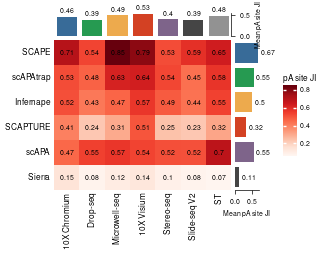

In [4]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    pas_match_jaccard_within_df,
    cmap=cmap[0],
    label="pA site JI",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(np.around(pas_match_jaccard_within_df.to_numpy(),2), color="black", fontsize=5))
h.add_right(mp.Numbers(
    pas_match_jaccard_within_df.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean pA site JI",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    pas_match_jaccard_within_df.mean().round(2),
    color=palette, 
    label="Mean pA site JI",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

# plt.savefig('/root/apabenchmark/plot/fig4/pas_jaccard_within.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

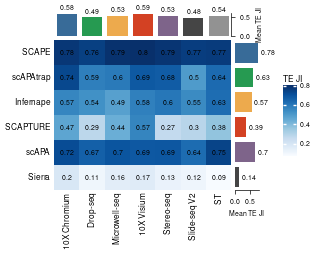

In [5]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    te_match_jaccard_within_df,
    cmap=cmap[1],
    label="TE JI",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(np.around(te_match_jaccard_within_df.to_numpy(),2), color="black", fontsize=5))
h.add_right(mp.Numbers(
    te_match_jaccard_within_df.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean TE JI",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    te_match_jaccard_within_df.mean().round(2),
    color=palette, 
    label="Mean TE JI",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

# plt.savefig('/root/apabenchmark/plot/fig4/te_jaccard_within.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False